<a href="https://colab.research.google.com/github/mafaldasalomao/binary_classification_breast_cancer/blob/main/Proj2_binary_classification_breast_cancer_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install skorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 5.2 MB/s 


## 1- Import libs

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from skorch import NeuralNetBinaryClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import sklearn

torch.__version__

'1.12.1+cu113'

## 2 - Base de dados

In [ ]:
np.random.seed(42)
torch.manual_seed(42)

In [ ]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classes = pd.read_csv('/content/saidas_breast.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


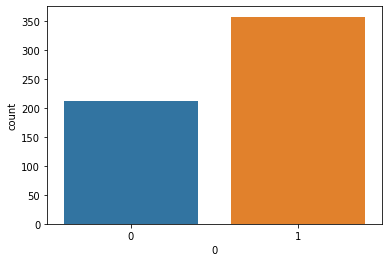

In [ ]:
sns.countplot(classes['0'])

In [ ]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classes, dtype='float32').squeeze(1)

classe.shape

(569,)

## 3 - Define class to NN

In [ ]:
class model_torch(nn.Module):
  def __init__(self):
    super().__init__()

    #create layers 30-> 16->16->1
    self.dense0 = nn.Linear(30, 16)
    #we need start weights
    torch.nn.init.uniform_(self.dense0.weight) #start weight uniform math
    self.activation0 = nn.ReLU() # actvation
    self.dense1 = nn.Linear(16,16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()
  

  #link the layers
  def forward(self, x):
    x = self.dense0(x)
    x = self.activation0(x)
    x = self.dense1(x)
    x = self.activation1(x)
    x = self.dense2(x)
    x = self.output(x)
    return x
  

## 4 - skorch

In [ ]:
from torch.optim import optimizer
model_sklearn = NeuralNetBinaryClassifier(module=model_torch,
                                  criterion=torch.nn.BCELoss,
                                  optimizer = torch.optim.Adam,
                                  lr = 0.001,
                                  optimizer_weight_decay=0.0001,
                                  max_epochs=100,
                                  batch_size=32,
                                  train_split=False)

## 5 - Cross val

In [ ]:

results = cross_val_score(model_sklearn, previsores, classe, cv=10, scoring='accuracy');

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/skorch/classifier.py", line 324, in fit
    return super().fit(X, y, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/skorch/net.py", line 1228, in fit
    self.initialize()
  File "/usr/local/lib/python3.7/dist-packages/skorch/net.py", line 820, in initializ

In [ ]:
class model_torch(nn.Module):
  def __init__(self):
    super().__init__()

    #create layers 30-> 16->16->1
    self.dense0 = nn.Linear(30, 16)
    #we need start weights
    torch.nn.init.uniform_(self.dense0.weight) #start weight uniform math
    self.activation0 = nn.ReLU() # actvation
    self.dropout0 = nn.Dropout(0.2) #sero 20% of neurons
    self.dense1 = nn.Linear(16,16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()
  

  #link the layers
  def forward(self, x):
    x = self.dense0(x)
    x = self.activation0(x)
    x = self.dropout0(x)
    x = self.dense1(x)
    x = self.activation1(x)
    x = self.dropout1(x)
    x = self.dense2(x)
    x = self.output(x)
    return x